loaded: 0
loaded: 500
loaded: 1000
loaded: 1500
loaded: 2000
loaded: 2500
loaded: 3000
loaded: 3500
loaded: 4000
loaded: 0
loaded: 500
loaded: 1000
loaded: 1500
loaded: 0
loaded: 500
loaded: 1000
loaded: 1500
loaded: 2000
loaded: 2500
loaded: 3000
loaded: 3500
loaded: 4000
loaded: 0
loaded: 500
loaded: 1000
loaded: 1500
UPDATE: Normalizing data
UPDATE: One-Hot Encoding data
Epoch 1/100
32/32 [==============================] - 5s 122ms/step - loss: 3.2694 - accuracy: 0.2300 - val_loss: 3.9137 - val_accuracy: 0.0405
Epoch 2/100
32/32 [==============================] - 6s 191ms/step - loss: 2.0936 - accuracy: 0.4314 - val_loss: 3.9125 - val_accuracy: 0.0302
Epoch 3/100
32/32 [==============================] - 6s 193ms/step - loss: 1.6817 - accuracy: 0.5188 - val_loss: 3.9051 - val_accuracy: 0.0640
Epoch 4/100
32/32 [==============================] - 7s 220ms/step - loss: 1.4874 - accuracy: 0.5671 - val_loss: 3.8151 - val_accuracy: 0.0985
Epoch 5/100
32/32 [==============================] 

32/32 [==============================] - 5s 142ms/step - loss: 0.1650 - accuracy: 0.9422 - val_loss: 1.8804 - val_accuracy: 0.6880
Epoch 56/100
32/32 [==============================] - 5s 146ms/step - loss: 0.3136 - accuracy: 0.9006 - val_loss: 1.2347 - val_accuracy: 0.7759
Epoch 57/100
32/32 [==============================] - 4s 129ms/step - loss: 0.2275 - accuracy: 0.9242 - val_loss: 1.1739 - val_accuracy: 0.7817
Epoch 58/100
32/32 [==============================] - 4s 122ms/step - loss: 0.1972 - accuracy: 0.9367 - val_loss: 1.0514 - val_accuracy: 0.8057
Epoch 59/100
32/32 [==============================] - 5s 143ms/step - loss: 0.1973 - accuracy: 0.9317 - val_loss: 1.0529 - val_accuracy: 0.8071
Epoch 60/100
32/32 [==============================] - 7s 233ms/step - loss: 0.1496 - accuracy: 0.9493 - val_loss: 1.2147 - val_accuracy: 0.7906
Epoch 61/100
32/32 [==============================] - 5s 162ms/step - loss: 0.1591 - accuracy: 0.9453 - val_loss: 1.0713 - val_accuracy: 0.8073
Epoch

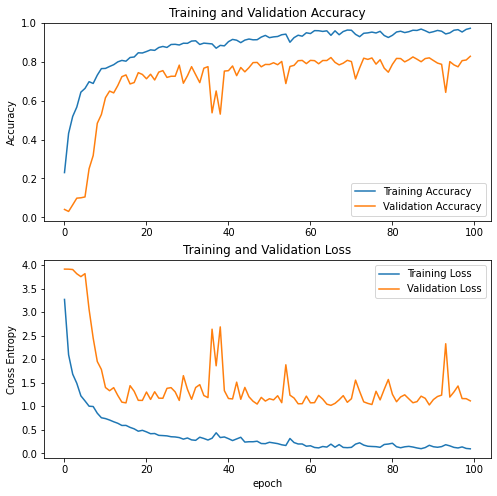

In [10]:
# import packages
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import argparse

# create neural network
class RoadSignClassifier:
    def createCNN(width, height, depth, classes):
        model = Sequential()
        inputShape = (height, width, depth)
        model.add(Conv2D(8, (5, 5), input_shape=inputShape, activation="relu"))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(16, (3, 3), activation="relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(16, (3, 3), activation="relu"))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(BatchNormalization())
        model.add(Flatten())
        model.add(Dropout(0.5))
        model.add(Dense(512, activation="relu"))
        model.add(Dense(classes, activation="softmax"))
        return model


# load images and resize
data_path = r"/Users/hdai/Documents/Junior Year/SML310/Final Project/TSRD"
def load_data(dataset):
    images = []
    classes = []
    rows = pd.read_csv(dataset)
    rows = rows.sample(frac=1).reset_index(drop=True)
    for i, row in rows.iterrows():
        img_class = row["ClassId"]
        img_path = row["Path"]
        image = os.path.join(data_path, img_path)
        image = cv2.imread(image)
        image_rs = cv2.resize(image, (32, 32), 3)
        R, G, B = cv2.split(image_rs)
        img_r = cv2.equalizeHist(R)
        img_g = cv2.equalizeHist(G)
        img_b = cv2.equalizeHist(B)
        new_image = cv2.merge((img_r, img_g, img_b))
        if i % 500 == 0:
            print(f"loaded: {i}")
        images.append(new_image)
        classes.append(img_class)
    X = np.array(images)
    y = np.array(classes)
    return (X, y)
        
# load training and testing data into same array
data_path = r"/Users/hdai/Documents/Junior Year/SML310/Final Project/TSRD"
def load_all_data():
    train_data = r"/Users/hdai/Documents/Junior Year/SML310/Final Project/TSRD/TSRD Train Complete.csv"    
    images = []
    classes = []
    rows = pd.read_csv(train_data)
    rows = rows.sample(frac=1).reset_index(drop=True)
    for i, row in rows.iterrows():
        img_class = row["ClassId"]
        img_path = row["Path"]
        image = os.path.join(data_path, img_path)
        image = cv2.imread(image)
        image_rs = cv2.resize(image, (32, 32), 3)
        R, G, B = cv2.split(image_rs)
        img_r = cv2.equalizeHist(R)
        img_g = cv2.equalizeHist(G)
        img_b = cv2.equalizeHist(B)
        new_image = cv2.merge((img_r, img_g, img_b))
        if i % 500 == 0:
            print(f"loaded: {i}")
        images.append(new_image)
        classes.append(img_class)        
    test_data = r"/Users/hdai/Documents/Junior Year/SML310/Final Project/TSRD/TSRD Test Complete.csv"
    rows = pd.read_csv(test_data)
    rows = rows.sample(frac=1).reset_index(drop=True)
    for i, row in rows.iterrows():
        img_class = row["ClassId"]
        img_path = row["Path"]
        image = os.path.join(data_path, img_path)
        image = cv2.imread(image)
        image_rs = cv2.resize(image, (32, 32), 3)
        R, G, B = cv2.split(image_rs)
        img_r = cv2.equalizeHist(R)
        img_g = cv2.equalizeHist(G)
        img_b = cv2.equalizeHist(B)
        new_image = cv2.merge((img_r, img_g, img_b))
        if i % 500 == 0:
            print(f"loaded: {i}")
        images.append(new_image)
        classes.append(img_class)
        
    X = np.array(images)
    y = np.array(classes)
    
    return (X, y)

# resplitting whole database
def data_reallocation(whole_X,whole_Y,num_image_per_label):
    num_image_per_label_count = np.array(len(num_image_per_label)*[0])
    images_training = []
    images_testing = []
    label_training = []
    label_testing = []
    for i in range(len(whole_Y)):
        if num_image_per_label_count[whole_Y[i]] < num_image_per_label[whole_Y[i]]:
            images_training.append(whole_X[i])
            label_training.append(whole_Y[i])
            num_image_per_label_count[whole_Y[i]]+=1
        else:
            images_testing.append(whole_X[i])
            label_testing.append(whole_Y[i])            
            
    
    return np.array(images_training),np.array(label_training),np.array(images_testing),np.array(label_testing)

# ap = argparse.ArgumentParser()
# ap.add_argument("-m", "--model", default="output/trafficsignnet_TSRD.model", help="path to output model")
# args = vars(ap.parse_args())

epochs = 100
learning_rate = 0.001
batch_size = 64

#####Run this part for the first time and save the pre-processed data. So you do not have to process it every time
train_data = r"/Users/hdai/Documents/Junior Year/SML310/Final Project/TSRD/TSRD Train Complete.csv"
test_data = r"/Users/hdai/Documents/Junior Year/SML310/Final Project/TSRD/TSRD Test Complete.csv"
(train_X, train_Y) = load_data(train_data)
(test_X, test_Y) = load_data(test_data)
np.save('TSRD_trainX',train_X)
np.save('TSRD_trainY',train_Y)
np.save('TSRD_testX',test_X)
np.save('TSRD_testY',test_Y)
#####

(whole_X, whole_Y) = load_all_data()
num_labels = len(np.unique(whole_Y))
wholeY = to_categorical(whole_Y, num_labels)
class_totals = wholeY.sum(axis=0)
num_image_per_label = np.round(1994/6164*class_totals)
train_X,train_Y,test_X,test_Y = data_reallocation(whole_X,whole_Y,num_image_per_label)
np.save('TSRD_trainX_balanced',train_X)
np.save('TSRD_trainY_balanced',train_Y)
np.save('TSRD_testX_balanced',test_X)
np.save('TSRD_testY_balanced',test_Y)

# train_X = np.load('TSRD_trainX_balanced.npy', allow_pickle=True)
# test_X = np.load('TSRD_testX_balanced.npy', allow_pickle=True)
# train_Y = np.load('TSRD_trainY_balanced.npy', allow_pickle=True)
# test_Y = np.load('TSRD_testY_balanced.npy', allow_pickle=True)
print("UPDATE: Normalizing data")
trainX = train_X.astype("float32") / 255.0
testX = test_X.astype("float32") / 255.0
print("UPDATE: One-Hot Encoding data")
num_labels = len(np.unique(train_Y))
trainY = to_categorical(train_Y, num_labels)
testY = to_categorical(test_Y, num_labels)



class_totals = trainY.sum(axis=0)
class_weights = class_totals.max() / class_totals
class_weight_dict = dict(enumerate(class_weights))

# data augmentation
data_aug = ImageDataGenerator(
rotation_range=10,
zoom_range=0.15,
width_shift_range=0.1,
height_shift_range=0.1,
shear_range=0.15,
horizontal_flip=False,
vertical_flip=False)

# train model
model = RoadSignClassifier.createCNN(width=32, height=32, depth=3, classes=58)
optimizer = Adam(learning_rate=learning_rate, decay=learning_rate / (epochs))
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])
fit = model.fit(
    data_aug.flow(trainX, trainY, batch_size=batch_size), 
    epochs=epochs,
    validation_data=(testX, testY),
   # class_weight=class_weight_dict,
    verbose=1)

acc = fit.history['accuracy']
val_acc = fit.history['val_accuracy']

loss = fit.history['loss']
val_loss = fit.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

np.save('TSRD_Individual_Learning_China_balanced2', [acc,loss,val_acc,val_loss])
# model.save(args["model"])